# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Imports

# Manipulação de dados
import numpy as np
import pandas as pd

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

numpy     : 1.21.5
pandas    : 1.4.4
seaborn   : 0.11.2
matplotlib: 3.5.2



# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
# Carrega o dataset
sinasc_raw = pd.read_csv('mod05_sinasc_ro_2019.csv')

In [5]:
# Shape
sinasc_raw.shape

(27028, 69)

In [6]:
# Colunas
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [7]:
# Amostra de dados
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [8]:
# Info
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [9]:
# Verificando máximos e mínimos da coluna munResLat
print(sinasc_raw['munResLat'].max())
print(sinasc_raw['munResLat'].min())

-8.76889
-13.49976


In [10]:
# Cortando a coluna munResLat em duas
sinasc_cut_a = pd.cut(sinasc_raw['munResLat'], [-14, -10.5, -8])

In [11]:
# Utilizaremos as seguintes variáveis numéricas: SEMAGESTAC APGAR1

sinasc_raw[['SEMAGESTAC', 'APGAR1']].groupby(sinasc_cut_a).agg([('Soma', 'sum'),
                                                                ('Média', 'mean'), 
                                                                ('Mínima', 'min'),
                                                                ('Máxima', 'max'), 
                                                                ('Mediana', np.median),
                                                                ('Desvio Padrão', np.std),
                                                                ('Variância', np.var)])

SEMAGESTAC                                                 \
                     Soma      Média Mínima Máxima Mediana Desvio Padrão   
munResLat                                                                  
(-14.0, -10.5]   482665.0  38.545360   19.0   45.0    39.0      2.012435   
(-10.5, -8.0]    511951.0  38.588302   21.0   45.0    39.0      2.020722   

                            APGAR1                                  \
               Variância      Soma     Média Mínima Máxima Mediana   
munResLat                                                            
(-14.0, -10.5]  4.049895  104590.0  8.070216    0.0   10.0     8.0   
(-10.5, -8.0]   4.083319  114559.0  8.199771    0.0   10.0     8.0   

                                        
               Desvio Padrão Variância  
munResLat                               
(-14.0, -10.5]      0.960767  0.923073  
(-10.5, -8.0]       1.002839  1.005686

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [12]:
# Criando faixas da área dos municípios
sinasc_raw['FaixaArea'] = None

sinasc_raw.loc[sinasc_raw['munResArea'] > (3000), 'FaixaArea'] = 'Acima'
sinasc_raw.loc[sinasc_raw['munResArea'] < (3000), 'FaixaArea'] = 'Abaixo'

In [13]:
# Agrupando usando as faixa como chave para as colunas QTDPARTCES e QTDPARTNOR
faixaArea = sinasc_raw['FaixaArea']

sinasc_raw.pivot_table(values = ['QTDPARTCES', 'QTDPARTNOR'], 
                        index = [faixaArea], 
                        aggfunc = [sum, np.mean, min, max, np.median, 'std', 'var']
                        )

sum                  mean                   min             \
          QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR   
FaixaArea                                                                     
Abaixo        2952.0     1912.0   0.572981   0.371334        0.0        0.0   
Acima        10184.0    12659.0   0.507070   0.632982        0.0        0.0   

                 max                median                   std             \
          QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR   
FaixaArea                                                                     
Abaixo           5.0       10.0        0.0        0.0   0.749368   0.856441   
Acima           12.0       41.0        0.0        0.0   0.744981   1.278932   

                 var             
          QTDPARTCES QTDPARTNOR  
FaixaArea                        
Abaixo      0.561553   0.733490  
Acima       0.554997   1.635668

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [14]:
# Verificando a coluna munResAlt

sinasc_raw['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [15]:
# Cortando a coluna munResAlt em quatro

sinasc_cut_b = pd.cut(sinasc_raw['munResAlt'], [84, 87, 153, 191, 596])

In [16]:
# Utilizaremos as seguintes variáveis numéricas: QTDPARTNOR QTDPARTCES
sinasc_raw[['QTDPARTNOR', 'QTDPARTCES']].groupby(sinasc_cut_b).agg([('Soma', 'sum'),
                                                                ('Média', 'mean'), 
                                                                ('Mínima', 'min'),
                                                                ('Máxima', 'max'), 
                                                                ('Mediana', np.median),
                                                                ('Desvio Padrão', np.std),
                                                                ('Variância', np.var)])

QTDPARTNOR                                                          \
                 Soma     Média Mínima Máxima Mediana Desvio Padrão Variância   
munResAlt                                                                       
(84, 87]       6024.0  0.801917    0.0   40.0     0.0      1.380931  1.906970   
(87, 153]      3283.0  0.744107    0.0   14.0     0.0      1.330296  1.769689   
(153, 191]     2915.0  0.423877    0.0    9.0     0.0      0.917432  0.841681   
(191, 596]     2349.0  0.370096    0.0   41.0     0.0      1.116704  1.247029   

           QTDPARTCES                                                          
                 Soma     Média Mínima Máxima Mediana Desvio Padrão Variância  
munResAlt                                                                      
(84, 87]       3364.0  0.448773    0.0   12.0     0.0      0.735847  0.541471  
(87, 153]      2333.0  0.519368    0.0    4.0     0.0      0.736689  0.542711  
(153, 191]     3563.0  0.517727    0.0   12.0     0.0      0.750559  0.563339  
(191, 596]     3876.0  0.608860    0.0    5.0     0.0      0.751648  0.564974

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [17]:
#Dicionário das regiões imediatas
mapping = {
    'Candeias do Jamari': 'Porto Velho',
    'Guajará-Mirim': 'Porto Velho',
    'Itapuã do Oeste': 'Porto Velho',
    'Nova Mamoré': 'Porto Velho',
    'Porto Velho': 'Porto Velho',
    'Alto Paraíso': 'Ariquemes',
    'Ariquemes': 'Ariquemes',
    'Buritis': 'Ariquemes',
    'Cacaulândia': 'Ariquemes',
    'Campo Novo de Rondônia': 'Ariquemes',
    'Cujubim': 'Ariquemes',
    'Monte Negro': 'Ariquemes',
    'Rio Crespo': 'Ariquemes',
    'Governador Jorge Teixeira': 'Jaru',
    'Jaru': 'Jaru',
    'Machadinho d''Oeste': 'Jaru',
    'Theobroma': 'Jaru',
    'Vale do Anari': 'Jaru',
    'Alvorada d''Oeste': 'Ji-Paraná',
    'Costa Marques': 'Ji-Paraná',
    'Ji-Paraná': 'Ji-Paraná',
    'Mirante da Serra': 'Ji-Paraná',
    'Nova União': 'Ji-Paraná',
    'Ouro Preto do Oeste': 'Ji-Paraná',
    'Presidente Médici': 'Ji-Paraná',
    'São Francisco do Guaporé': 'Ji-Paraná',
    'São Miguel do Guaporé': 'Ji-Paraná',
    'Seringueiras': 'Ji-Paraná',
    'Teixeirópolis': 'Ji-Paraná',
    'Urupá': 'Ji-Paraná',
    'Vale do Paraíso': 'Ji-Paraná',
    'Alta Floresta d''Oeste': 'Cacoal',
    'Alto Alegre dos Parecis': 'Cacoal',
    'Cacoal': 'Cacoal',
    'Castanheiras': 'Cacoal',
    'Espigão d''Oeste': 'Cacoal',
    'Ministro Andreazza': 'Cacoal',
    'Nova Brasilândia d''Oeste': 'Cacoal',
    'Novo Horizonte do Oeste': 'Cacoal',
    'Parecis': 'Cacoal',
    'Pimenta Bueno': 'Cacoal',
    'Primavera de Rondônia': 'Cacoal',
    'Rolim de Moura': 'Cacoal',
    'Santa Luzia d''Oeste': 'Cacoal',
    'São Felipe d''Oeste': 'Cacoal',
    'Cabixi': 'Vilhena',
    'Cerejeiras': 'Vilhena',
    'Chupinguaia': 'Vilhena',
    'Colorado do Oeste': 'Vilhena',
    'Corumbiara': 'Vilhena',
    'Pimenteiras do Oeste': 'Vilhena',
    'Vilhena': 'Vilhena'
}

In [18]:
# Criando a coluna MES
sinasc_raw.loc[:,'DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])
sinasc_raw.set_index('DTNASC', inplace=True)
sinasc_raw['MES'] = sinasc_raw.index.month

In [19]:
sinasc_b = sinasc_raw.set_index('munResNome')

In [20]:
sinasc_c = sinasc_b.pivot_table(values=['IDADEMAE'],
                     index=['MES'],
                     columns=[mapping],
                     aggfunc={'IDADEMAE': 'mean'})
sinasc_c

IDADEMAE                                                        
munResNome  Ariquemes     Cacoal       Jaru  Ji-Paraná Porto Velho    Vilhena
MES                                                                          
1           24.866412  26.435115  26.037037  25.845411   26.017668  26.665049
2           25.316239  26.253676  26.105882  26.513298   26.215000  26.781818
3           25.288660  26.560000  26.183486  25.476404   26.347207  26.386667
4           25.411972  26.127517  25.561224  26.099526   26.172336  26.686099
5           25.410256  26.478873  25.009615  25.869464   25.830470  25.586207
6           26.652510  25.798535  26.637363  26.215190   26.421628  26.526627
7           24.973783  26.817518  24.757895  25.911357   26.139903  26.373057
8           25.684615  26.608527  25.742857  25.897098   26.070588  26.297436
9           25.561644  27.009709  25.694737  25.621495   25.966435  26.407407
10          25.736111  26.111498  26.666667  26.209719   25.886473  26.161435
11          25.765432  26.555970  25.673469  27.431694   26.394737  26.169725
12          24.821577  26.425087  25.750000  26.504274   26.575567  27.010753

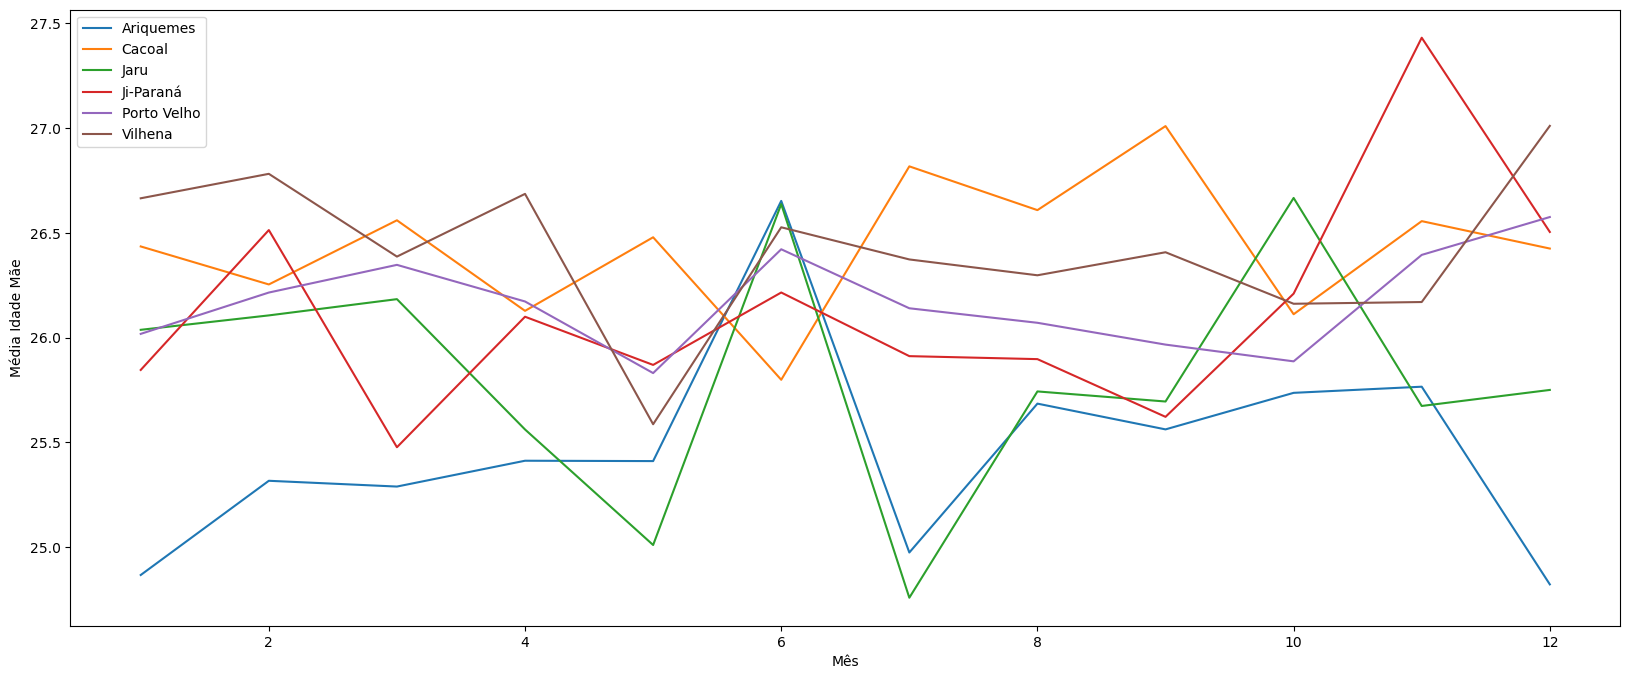

In [21]:
# Plot
sinasc_c.plot(figsize=[20,8])

plt.xlabel('Mês')
plt.ylabel('Média Idade Mãe')
plt.legend(['Ariquemes', 'Cacoal', 'Jaru', 'Ji-Paraná', 'Porto Velho', 'Vilhena']);

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave

### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [22]:
# Agrupamento da média da coluna IDADEMAE com mapping como chave:

mapping = {'Porto Velho' : 'IDH-M alto', 
           'Vilhena' : 'IDH-M alto', 
           'Cacoal' : 'IDH-M alto', 
           'Ji-Paraná' : 'IDH-M alto', 
           'Pimenta Bueno' : 'IDH-M alto', 
           'Ariquemes' : 'IDH-M alto',
           'Rolim de Moura' : 'IDH-M alto',
           'Cerejeiras' : 'IDH-M médio',
           'Jaru' : 'IDH-M médio',
           'Colorado do Oeste' : 'IDH-M médio',
           'Ouro Preto do Oeste' : 'IDH-M médio',
           "Espigão d'Oeste" : 'IDH-M médio',
           "Santa Luzia d'Oeste" : 'IDH-M médio',
           'Pimenteiras do Oeste' : 'IDH-M médio',
           'Presidente Médici' : 'IDH-M médio',
           'Castanheiras' : 'IDH-M médio',
           'Guajará-Mirim' : 'IDH-M médio',
           'Chupinguaia' : 'IDH-M médio',
           'Cabixi' : 'IDH-M médio',
           'Candeias do Jamari' : 'IDH-M médio',
           "São Felipe d'Oeste" : 'IDH-M médio',
           'Cacaulândia' : 'IDH-M médio',
           'São Miguel do Guaporé' : 'IDH-M médio',
           'Mirante da Serra' : 'IDH-M médio',
           "Alvorada d'Oeste" : 'IDH-M médio',
           'Teixeirópolis' : 'IDH-M médio',
           "Nova Brasilândia d'Oeste" : 'IDH-M médio',
           'Rio Crespo' : 'IDH-M médio',
           'Primavera de Rondônia' : 'IDH-M médio',
           "Alta Floresta d'Oeste" : 'IDH-M médio',
           'Ministro Andreazza' : 'IDH-M médio',
           'Novo Horizonte do Oeste' : 'IDH-M médio',
           'Vale do Paraíso' : 'IDH-M médio',
           'Alto Paraíso' : 'IDH-M médio',
           'Parecis' : 'IDH-M médio',
           'Buritis' : 'IDH-M médio',
           'Itapuã do Oeste' : 'IDH-M médio',
           'Corumbiara' : 'IDH-M médio',
           'Cujubim' : 'IDH-M médio',
           'Costa Marques' : 'IDH-M médio',
           'São Francisco do Guaporé' : 'IDH-M médio',
           'Urupá' : 'IDH-M médio',
           'Monte Negro' : 'IDH-M médio',
           'Seringueiras' : 'IDH-M baixo',
           'Governador Jorge Teixeira' : 'IDH-M baixo',
           "Machadinho d'Oeste" : 'IDH-M baixo',
           'Campo Novo de Rondônia' : 'IDH-M baixo',
           'Alto Alegre dos Parecis' : 'IDH-M baixo',
           'Theobroma' : 'IDH-M baixo',
           'Nova União' : 'IDH-M baixo',
           'Nova Mamoré' : 'IDH-M baixo',
           'Vale do Anari' : 'IDH-M baixo'}

In [23]:
sinasc_e = sinasc_b.pivot_table(values=['IDADEMAE', 'QTDFILVIVO', 'QTDFILMORT', 'APGAR1', 'APGAR5', 'PESO', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'CONSPRENAT'],
                     index=[mapping],
                     aggfunc='mean')
sinasc_e

,APGAR1,APGAR5,CONSPRENAT,IDADEMAE,IDADEPAI,PESO,QTDFILMORT,QTDFILVIVO,QTDPARTCES,QTDPARTNOR
munResNome,,,,,,,,,,
IDH-M alto,8.172839,9.171668,8.239692,26.280332,31.074091,3245.623791,0.272297,1.033960,0.499454,0.578495
IDH-M baixo,8.110943,9.267925,8.106119,25.269231,30.402332,3244.309955,0.253521,1.056270,0.522376,0.620232
IDH-M médio,8.128198,9.225567,8.398464,25.848191,31.570029,3245.670333,0.272386,1.093111,0.548451,0.589560


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM

In [24]:
mapping = {'Ariquemes': 'Desenvolvimento moderado', 
           'Vilhena': 'Desenvolvimento moderado', 
           'Pimenta Bueno': 'Desenvolvimento moderado', 
           'Porto Velho': 'Desenvolvimento moderado', 
           'Ji-Paraná': 'Desenvolvimento moderado', 
           'Cacoal': 'Desenvolvimento moderado', 
           'Santa Luzia d''Oeste': 'Desenvolvimento moderado',
           'Rolim de Moura': 'Desenvolvimento moderado',
           'Chupinguaia': 'Desenvolvimento moderado',
           'São Miguel do Guaporé': 'Desenvolvimento moderado',
           'Pimenteiras do Oeste': 'Desenvolvimento moderado',
           'Teixeirópolis': 'Desenvolvimento moderado',
           'Colorado do Oeste': 'Desenvolvimento moderado',
           'Jaru': 'Desenvolvimento moderado',
           'Rio Crespo': 'Desenvolvimento moderado',
           'Primavera de Rondônia': 'Desenvolvimento moderado',
           'Alta Floresta d''Oeste': 'Desenvolvimento moderado',
           'Ouro Preto do Oeste': 'Desenvolvimento moderado',
           'São Francisco do Guaporé': 'Desenvolvimento moderado',
           'Candeias do Jamari': 'Desenvolvimento moderado',
           'Buritis': 'Desenvolvimento moderado',
           'São Felipe d''Oeste': 'Desenvolvimento moderado',
           'Presidente Médici': 'Desenvolvimento moderado',
           'Cerejeiras': 'Desenvolvimento moderado',
           'Monte Negro': 'Desenvolvimento moderado',
           'Urupá': 'Desenvolvimento moderado',
           'Espigão d''Oeste': 'Desenvolvimento regular',
           'Seringueiras': 'Desenvolvimento regular',
           'Alvorada d''Oeste': 'Desenvolvimento regular',
           'Itapuã do Oeste': 'Desenvolvimento regular',
           'Cabixi': 'Desenvolvimento regular',
           'Novo Horizonte do Oeste': 'Desenvolvimento regular',
           'Nova Brasilândia d''Oeste': 'Desenvolvimento regular',
           'Vale do Paraíso': 'Desenvolvimento regular',
           'Corumbiara': 'Desenvolvimento regular', 
           'Alto Paraíso': 'Desenvolvimento regular',
           'Cacaulândia': 'Desenvolvimento regular', 
           'Vale do Anari': 'Desenvolvimento regular', 
           'Ministro Andreazza': 'Desenvolvimento regular',
           'Costa Marques': 'Desenvolvimento regular',
           'Nova União': 'Desenvolvimento regular',
           'Guajará-Mirim': 'Desenvolvimento regular',
           'Mirante da Serra': 'Desenvolvimento regular',
           'Parecis': 'Desenvolvimento regular', 
           'Castanheiras': 'Desenvolvimento regular',
           'Theobroma': 'Desenvolvimento regular',
           'Machadinho d''Oeste': 'Desenvolvimento regular',
           'Campo Novo de Rondônia': 'Desenvolvimento regular',
           'Nova Mamoré': 'Desenvolvimento regular',
           'Cujubim': 'Desenvolvimento regular', 
           'Alto Alegre dos Parecis': 'Desenvolvimento regular',
           'Governador Jorge Teixeira': 'Desenvolvimento regular'}

In [25]:
sinasc_d = sinasc_b.pivot_table(values=['IDADEMAE', 'QTDFILVIVO', 'QTDFILMORT', 'APGAR1', 'APGAR5', 'PESO', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'CONSPRENAT'],
                     index=[mapping],
                     aggfunc='mean')
sinasc_d

,APGAR1,APGAR5,CONSPRENAT,IDADEMAE,IDADEPAI,PESO,QTDFILMORT,QTDFILVIVO,QTDPARTCES,QTDPARTNOR
munResNome,,,,,,,,,,
Desenvolvimento moderado,8.166159,9.184522,8.333673,26.226921,31.145206,3243.947354,0.272476,1.030350,0.517982,0.558033
Desenvolvimento regular,8.105263,9.233004,7.948596,25.412005,31.345297,3255.036835,0.264967,1.172404,0.494034,0.728571


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [26]:
mapping = {'Porto Velho': 'Acima de 1 Bilhão', 
           'Ji-Paraná': 'Acima de 1 Bilhão', 
           'Vilhena': 'Acima de 1 Bilhão', 
           'Ariquemes': 'Acima de 1 Bilhão',
           'Cacoal': 'Acima de 1 Bilhão',
           'Jaru': 'Acima de 1 Bilhão',
           'Rolim de Moura': 'Acima de 1 Bilhão',
           'Pimenta Bueno': 'Acima de 1 Bilhão',
           'Guajará-Mirim': 'Acima de 500 Milhões',
           'Ouro Preto do Oeste': 'Acima de 500 Milhões',
           'Buritis': 'Acima de 500 Milhões',
           'Machadinho d''Oeste': 'Acima de 500 Milhões',
           'Espigão d''Oeste': 'Acima de 500 Milhões',
           'São Miguel do Guaporé': 'Acima de 500 Milhões',
           'Candeias do Jamari': 'Acima de 500 Milhões',
           'Nova Mamoré': 'Acima de 500 Milhões',
           'Cerejeiras': 'Acima de 500 Milhões',
           'Alta Floresta d''Oeste': 'Acima de 300 Milhões',
           'Presidente Médici': 'Acima de 300 Milhões',
           'Cujubim': 'Acima de 300 Milhões',
           'Nova Brasilândia d''Oeste': 'Acima de 300 Milhões',
           'Alto Paraíso': 'Acima de 300 Milhões',
           'São Francisco do Guaporé': 'Acima de 300 Milhões',
           'Colorado do Oeste': 'Acima de 300 Milhões',
           'Monte Negro': 'Acima de 200 Milhões',
           'Alto Alegre dos Parecis': 'Acima de 200 Milhões',
           'Campo Novo de Rondônia': 'Acima de 200 Milhões',
           'Alvorada d''Oeste': 'Acima de 200 Milhões',
           'Chupinguaia': 'Acima de 100 Milhões',
           'Corumbiara': 'Acima de 100 Milhões',
           'Ministro Andreazza': 'Acima de 100 Milhões',
           'Urupá': 'Acima de 100 Milhões',
           'Costa Marques': 'Acima de 100 Milhões',
           'Seringueiras': 'Acima de 100 Milhões',
           'Mirante da Serra': 'Acima de 100 Milhões',
           'Governador Jorge Teixeira': 'Acima de 100 Milhões',
           'Theobroma': 'Acima de 100 Milhões',
           'Santa Luzia d''Oeste': 'Acima de 100 Milhões',
           'Novo Horizonte do Oeste': 'Acima de 100 Milhões',
           'Itapuã do Oeste': 'Acima de 100 Milhões',
           'Vale do Paraíso': 'Acima de 100 Milhões',
           'Cacaulândia': 'Acima de 100 Milhões',
           'Cabixi': 'Acima de 100 Milhões',
           'Vale do Anari': 'Acima de 100 Milhões',
           'Nova União': 'Até 100 Milhões',
           'Parecis': 'Até 100 Milhões',
           'Rio Crespo': 'Até 100 Milhões',
           'Pimenteiras do Oeste': 'Até 100 Milhões',
           'Teixeirópolis': 'Até 100 Milhões',
           'São Felipe d''Oeste': 'Até 100 Milhões',
           'Castanheiras': 'Até 100 Milhões',
           'Primavera de Rondônia': 'Até 100 Milhões'}

In [27]:
sinasc_e = sinasc_b.pivot_table(values=['IDADEMAE', 'QTDFILVIVO', 'QTDFILMORT', 'APGAR1', 'APGAR5', 'PESO', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'CONSPRENAT'],
                     index=[mapping],
                     aggfunc='mean')
sinasc_e

,APGAR1,APGAR5,CONSPRENAT,IDADEMAE,IDADEPAI,PESO,QTDFILMORT,QTDFILVIVO,QTDPARTCES,QTDPARTNOR
munResNome,,,,,,,,,,
Acima de 1 Bilhão,8.167346,9.166223,8.291353,26.265562,31.108387,3247.215719,0.270229,1.026435,0.499939,0.569137
Acima de 100 Milhões,8.054743,9.173984,8.686188,25.638424,31.744348,3250.392337,0.239824,0.992320,0.522602,0.487603
Acima de 200 Milhões,8.177264,9.319846,8.126953,25.146435,30.187500,3233.701349,0.263982,1.010526,0.623126,0.531674
Acima de 300 Milhões,7.958466,9.092000,8.745161,25.706070,30.819149,3240.387380,0.251828,1.062097,0.552674,0.527082
Acima de 500 Milhões,8.256603,9.364374,7.786372,25.785927,31.381955,3243.336315,0.319958,1.228385,0.545637,0.773682
Até 100 Milhões,7.941645,9.095491,8.574124,26.519894,31.626126,3197.679045,0.172507,1.032258,0.596774,0.466488


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

**Item 1**: Não é muito relevante para nossa análise. O APGAR1 médio é um pouco maior em latitudes maiores que -10.5.

**Item 2**: Quanto maior a aréa do município, maior os valore  média de partos normais e cesarianas.

**Item 3**: Quanto menor a altitude do município, maior a média de partos normais. E o inverso é real, quanto maior a altitude, maior a média de partos cesáreos.

**Item 4**: Não possui nenhuma tendência clara que possamos utilizar.

**Item 5.1**: A Média de idade do pai é superior a da mãe, a maior quantidade cesárias pode ser observada onde apresenta IDH-M médio e quantidade de partos normais maior em IDH-M baixo.

**Item 5.2**: Pré natal, APGAR1 e cesarianas apresentam valores superiores na região de Desenvolvimento moderado, porém os dados de um forma geral são bem próximos.

**Item 5.3**:Os dados não seguem uma tendência linear o que dificulta a análise.